Requirement1:


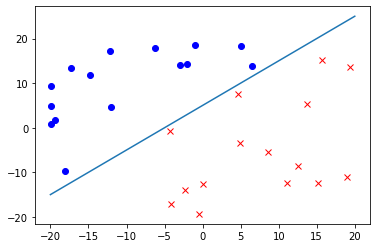



-----------------------------------------------------------------------------------------
Requirement2:
Trial 1's number of iterations when PLA halts: 107


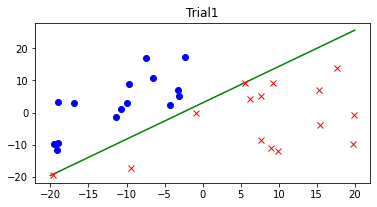

Trial 2's number of iterations when PLA halts: 23


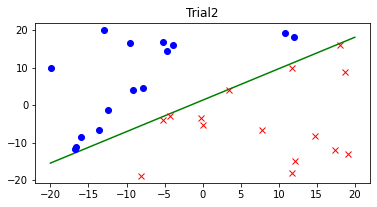

Trial 3's number of iterations when PLA halts: 34


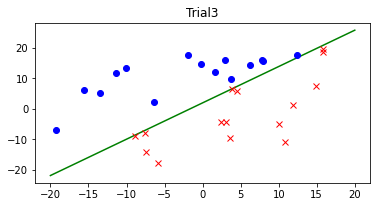


Average number of iterations 54.666666666666664
-----------------------------------------------------------------------------------------
Requirement3:
PLA execution time: 0.24556899070739746
Pocket Algorithm execution time: 2.6519930362701416


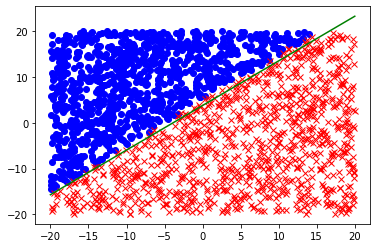

-----------------------------------------------------------------------------------------
Requirement4:
Accurary in Problem3: 0.9825
Accurary in Problem4: 0.9385


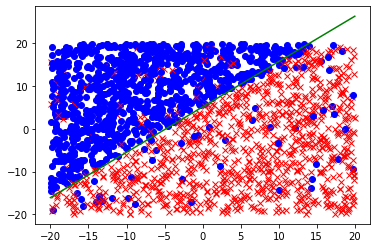

In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt  
import time
import math
#Requirement1
m = 1
b = 5
#threshold = 0.5  # 距離線的最小距離閾值

# 隨機生成 30 個 2D 點，其中線的右邊 15 個標記為-1，左邊 15 個標記為+1,不能落在線上
positive_samples = []
negative_samples = []
while len(positive_samples) < 15 or len(negative_samples) < 15:
    x = random.uniform(-20, 20)
    y = random.uniform(-20, 20)
    #dist = abs(m * x - y + b) / math.sqrt(m ** 2 + 1)  # 計算距離線的距離
    if (y > m * x + b and len(positive_samples) < 15):
        if len(positive_samples) < 15:
            positive_samples.append((x, y ,1))

    elif (y < m * x + b and len(negative_samples) < 15):
        if len(negative_samples) < 15:
          negative_samples.append((x, y ,-1))
    else:
      continue

data = positive_samples + negative_samples

for x,y,label in data:
  if label==1:
    plt.plot(x,y,'bo')
  else:
    plt.plot(x,y,'rx')

# 繪製生成的線
print("Requirement1:")
x = [-20, 20]
y = [m * xi + b for xi in x]
plt.plot(x, y)
plt.show()
print("\n")

#-------------------------------------------------------------------------------------------------------------------
print("-----------------------------------------------------------------------------------------")
#Requirement2
print("Requirement2:")
# 定義 PLA 函數
def PLA(data, w):
    iteration = 0
    while True:
        error_count = 0
        for x, y, label in data:
            if np.sign(np.dot(w, [x, y, 1])) != label:
                w += label * np.array([x, y, 1])
                error_count += 1
        if error_count == 0:
            return w,iteration
        iteration += 1

total_iteration=0
for i in range(3):
  positive_samples = []
  negative_samples = []
  while len(positive_samples) < 15 or len(negative_samples) < 15:
      x = random.uniform(-20, 20)
      y = random.uniform(-20, 20)
      if (y > m * x + b and len(positive_samples) < 15):
          if len(positive_samples) < 15:
              positive_samples.append((x, y ,1))

      elif (y < m * x + b and len(negative_samples) < 15):
          if len(negative_samples) < 15:
              negative_samples.append((x, y ,-1))
      else:
          continue
  data = positive_samples + negative_samples
  # 初始化權重向量
  w0= np.array([0.0, 0.0, 0.0])
  # 執行 PLA，並將結果加入列表中
  w,iteration = (PLA(data, w0))
  total_iteration+=iteration
  print("Trial {}'s number of iterations when PLA halts: {}".format(i+1,iteration))
  x=[-20,20]
  y=[-(w[0] * xi + w[2]) / w[1] for xi in x]   # w[0]x + w[1]y + w[2] = 0 的直線 ==> y = -(w[0]/w[1])x - (w[2]/w[1]) 
  plt.figure(figsize=(6, 10))
  plt.subplot(3, 1, i+1)
  plt.plot(x, y, color='green')
  plt.title("Trial{}".format(i+1))
  for x,y,label in data:
    if label == 1:
      plt.plot(x, y, 'bo')
    else:
      plt.plot(x, y, 'rx')
  plt.plot(x, y, color='green')
  plt.show()

print("\nAverage number of iterations {}".format(total_iteration/3))

#-------------------------------------------------------------------------------------------------------------------

#Requirement3
#PLA目的在找出一個絕對好的分類器，但Pocket則是找出相對好的即可
print("-----------------------------------------------------------------------------------------")
print("Requirement3:")

positive_samples = []
negative_samples = []
while len(positive_samples) < 1000 or len(negative_samples) < 1000:
    x = random.uniform(-20, 20)
    y = random.uniform(-20, 20)
    if (y > m * x + b and len(positive_samples) < 1000):
        if len(positive_samples) < 1000:
            positive_samples.append((x, y ,1))
    elif (y < m * x + b and len(negative_samples) < 1000):
        if len(negative_samples) < 1000:
            negative_samples.append((x, y ,-1))
    else:
        continue

data = positive_samples + negative_samples

for x,y,label in data:
  if label==1:
    plt.plot(x,y,'bo')
  else:
    plt.plot(x,y,'rx')


# Define Pocket Algorithm function
def pocket(data,w0):
  w_pocket=w0
  w=w0
  min_pocket=np.array([0.0, 0.0, 0.0])
  iteration=0
  min_error=len(data) # 初始化錯誤次數為數據點個數
  error_count=0
  while iteration < 2000:
    i = random.randint(0,len(data)-1)
    x,y,label=data[i]
    if np.sign(np.dot(w,[x,y,1]))!= label:
      w_new = w + label * np.array([x,y,1])
      error_count = sum([np.sign(np.dot(w_new, [x, y, 1])) != label for x, y, label in data])
      # 檢查錯誤率是否下降，若是就更新 Pocket 中的權重向量
      #print("error_count:",error_count,"min_error:",min_error)
      #print("The w_new:",w_new)
      #print("Now w_pocket:",w_pocket)
      if error_count < min_error:
        w_pocket=w_new.copy()
        min_error=error_count
        #print("update w_pocket",w_pocket)
    w=w_new.copy()
    iteration += 1
  return w_pocket,min_error


w0= np.array([0.0, 0.0, 0.0])
# Run PLA and measure the execution time
start_time = time.time()
w_pla,iteration = PLA(data,w0)
end_time = time.time()
print("PLA execution time:", end_time-start_time)

w0= np.array([0.0, 0.0, 0.0])
# Run Pocket Algorithm and measure the execution time
start_time = time.time()
w_pocket3,error3 = pocket(data,w0)
end_time = time.time()
print("Pocket Algorithm execution time:", end_time-start_time)


x=[-20,20]
y=[-(w_pocket3[0] * xi + w_pocket3[2]) / w_pocket3[1] for xi in x]
plt.plot(x, y, color='green')
plt.show()

#-------------------------------------------------------------------------------------------------------------------
print("-----------------------------------------------------------------------------------------")
#Requirement4
print("Requirement4:")
# Randomly mislabel 50 positive and 50 negative samples
positive_samples_mislabeled = random.sample([sample for sample in positive_samples if sample[2]==1], k=50)
for sample in positive_samples_mislabeled:
    index = positive_samples.index(sample)
    positive_samples[index] = (sample[0], sample[1], -1)

negative_samples_mislabeled = random.sample([sample for sample in negative_samples if sample[2]==-1], k=50)
for sample in negative_samples_mislabeled:
    index = negative_samples.index(sample)
    negative_samples[index] = (sample[0], sample[1], 1)

# Merge the mislabeled samples with the original dataset
data = positive_samples + negative_samples
w0= np.array([0.0, 0.0, 0.0])
w_pocket4,error4 = pocket(data,w0)
print("Accurary in Problem3:",1 - error3/len(data))
print("Accurary in Problem4:",1 - error4/len(data))

for x,y,label in data:
  if label==1:
    plt.plot(x,y,'bo')
  else:
    plt.plot(x,y,'rx')

x = np.linspace(-20, 20, 40)
y=[-(w_pocket4[0] * xi + w_pocket4[2]) / w_pocket4[1] for xi in x]
plt.plot(x, y, color='green')
plt.show()
